## Observations and Insights 

#Observations & Insights from Analysis
1. From the statistics summary there are two drug regimens that had promising tumor volume statistics scores that are worth digging into because of the low average volume of the tumor over the course of the study, while also having the lowest standard error. Both of these mice also had the most overall mice to make it through the study.
- Capomulin (Stardard Deviation -> 4.99) & (SEM -> 0.329)
- Ramicane (Std Devation -> 4.85) & (SEM-> 0.321)
- ![bar1](Images/bar1.png)
1. After running the Drug Degimen -Capomulin- through the regression modeling it is clear that there is a strong correllation between the weight of the mice and the size of the tumor. As the tumor size decreased the weight decreased.
- The correlation between both factors is 0.95
- The r-squared is: 0.9
1. After comparing the drug regimen capomulin and ramicane to two other candits its clear visually that these two drugs stand apart.
![box1](Images/box1.png)

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df_master= pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
df_master.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:


# Checking the number of mice.
# df_master.count()
df_master.info()

total_mice = df_master["Mouse ID"].nunique()
total_mice 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


249

In [3]:
#Second Method as shared by Austin
#https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-conditions-on-column-values/

# Create dataframe count of timepoints to find duplicates
#https://stackoverflow.com/questions/10373660/converting-a-pandas-groupby-output-from-series-to-dataframe
group_df = pd.DataFrame({"count" : df_master.groupby(["Mouse ID", "Timepoint"]).size()}).reset_index()

#locate duplicate counts
duplicate_mice_ID = group_df.loc[group_df["count"] > 1]
duplicate_mice_ID



,Mouse ID,Timepoint,count
586,g989,0,2
587,g989,5,2
588,g989,10,2
589,g989,15,2
590,g989,20,2


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#drop mouse ID g989 due to duplicate rows
indexNames = df_master[ df_master['Mouse ID'] == "g989" ].index
df_master.drop(indexNames , inplace=True)


In [6]:
# Checking the number of mice in the clean DataFrame.
df_master.info()
total_mice = df_master["Mouse ID"].nunique()
total_mice 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_df_group = df_master.groupby("Drug Regimen")

#Tumor Volume Statistics
#Mean
mean_tumor = regimen_df_group["Tumor Volume (mm3)"].mean()
#Median
median_tumor = regimen_df_group["Tumor Volume (mm3)"].median()
#Variance
var_tumor = regimen_df_group["Tumor Volume (mm3)"].var()
#Standard Deviation
std_tumor = regimen_df_group["Tumor Volume (mm3)"].std()
#Standard Error
sem_tumor = regimen_df_group["Tumor Volume (mm3)"].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen_summary1 = pd.DataFrame({"mean": mean_tumor, "median" : median_tumor, "variance": var_tumor, \
                                "Standard Deviation": std_tumor, "SEM": sem_tumor})
regimen_summary1

,mean,median,variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
regimen_summary2 = regimen_df_group.agg({"Tumor Volume (mm3)": ["mean", "median","var", "std", "sem"]})
regimen_summary2 

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
df_master.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


Text(0.5, 0, 'Time Point')

<Figure size 1440x720 with 0 Axes>

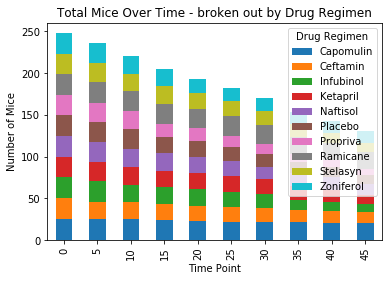

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#number of mice in each regimen utilizing (pd)
# bar_chart_data = pd.DataFrame({"Total Mice" : df_master.groupby(["Drug Regimen", "Timepoint"])["Mouse ID"].count()})
# bar_chart_data

#https://stackoverflow.com/questions/23415500/pandas-plotting-a-stacked-bar-chart
bar_df = df_master.groupby(["Drug Regimen", "Timepoint"])["Mouse ID"].count().unstack("Drug Regimen").fillna(0)
plt.figure(figsize=(20,10))
bar_df.plot(kind='bar', stacked=True)

plt.title("Total Mice Over Time - broken out by Drug Regimen")
plt.ylabel("Number of Mice")
plt.xlabel("Time Point")


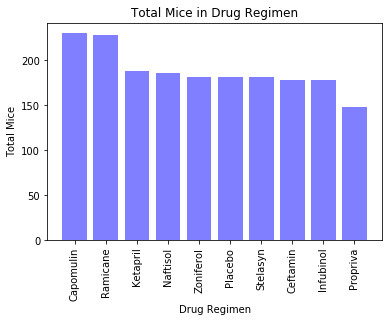

In [51]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# Set x axis and tick locations
pyplot_bar_data = pd.DataFrame({"total count" : df_master.groupby("Drug Regimen")["Mouse ID"].count()}).reset_index()
sorted_pyplot_bar = pyplot_bar_data.sort_values(by="total count", ascending=False)
x_axis = np.arange(len(pyplot_bar_data))
tick_locations = [value for value in x_axis]


bar = plt.bar(x_axis, sorted_pyplot_bar["total count"], color='b', alpha=0.5, align="center")
x_tick = plt.xticks(tick_locations, sorted_pyplot_bar["Drug Regimen"], rotation="vertical")

plt.title("Total Mice in Drug Regimen")
plt.ylabel("Total Mice")
plt.xlabel("Drug Regimen")

# Save the figure
plt.savefig('../Images/bar1.png')


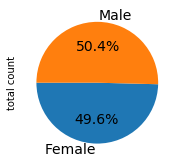

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Generate a pie plot showing the distribution of female versus male mice using pyplot
pyplot_pieplot = pd.DataFrame({"total count" : df_master.groupby("Sex")["Mouse ID"].nunique()}).reset_index()


# plot chart
ax1 = plt.subplot(121, aspect='equal')
pieplot = pyplot_pieplot.plot(kind='pie', y = "total count", ax=ax1, autopct='%1.1f%%', 
 startangle=180, shadow=False, labels=pyplot_pieplot.iloc[:,0], legend = False, fontsize=14)


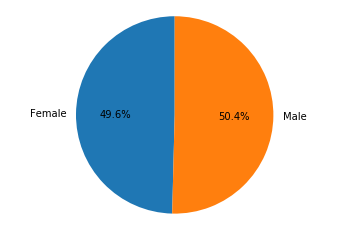

In [13]:
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(pyplot_pieplot["total count"], labels=pyplot_pieplot.iloc[:,0], autopct="%1.1f%%", startangle=90)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
df_max_timepoint = pd.DataFrame({"Timepoint": df_master.groupby(["Mouse ID"])["Timepoint"].max()}).reset_index()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = df_max_timepoint.merge(df_master, on= ["Mouse ID", "Timepoint"], how="inner")


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
target_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Locate the rows which contain mice on each drug 
# https://stackoverflow.com/questions/17424182/extracting-all-rows-from-pandas-dataframe-that-have-certain-value-in-a-specific
target_drug_df = merge_df[merge_df["Drug Regimen"].isin(target_drugs)]


#Get the tumor volumes and sort
tumor_mass_df = pd.DataFrame({"Tumor Vol Sum" : target_drug_df.groupby(["Drug Regimen", "Mouse ID"])["Tumor Volume (mm3)"].sum()}).reset_index("Mouse ID")
sorted_tumor_df = tumor_mass_df.sort_values(by = "Tumor Vol Sum")
sorted_tumor_df


# Determine outliers using upper and lower bounds
quartiles = sorted_tumor_df["Tumor Vol Sum"].quantile([.25,.5,.75])
lq = quartiles[0.25]
uq = quartiles[0.75]
iqr = uq-lq   

print(f"The lower quartile tumor size is: {round(lq,2)} mm3")
print(f"The upper quartile tumor size is: {round(uq,2)} mm3")
print(f"The interquartile range of tumor size is: {round(iqr,2)} mm3")
print(f"The the median of tumor size is: {quartiles[0.5]} mm3 ")

lower_bound = lq - (1.5*iqr)
upper_bound = uq + (1.5*iqr)

print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")

The lower quartile tumor size is: 37.19 mm3
The upper quartile tumor size is: 59.93 mm3
The interquartile range of tumor size is: 22.74 mm3
The the median of tumor size is: 45.0 mm3 
Values below 3.07 could be outliers.
Values above 94.04 could be outliers.


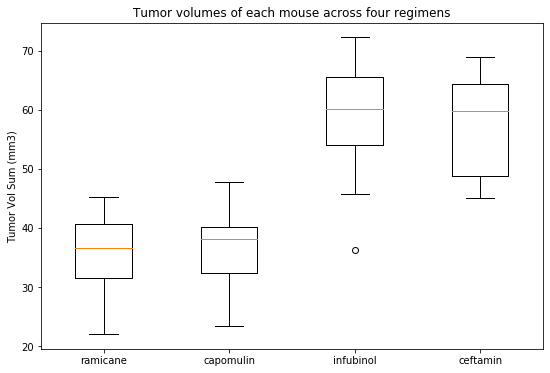

In [46]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Create a figure instance
#resource: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html
ramicane_df = sorted_tumor_df.loc["Ramicane","Tumor Vol Sum"]
capomulin_df = sorted_tumor_df.loc["Capomulin","Tumor Vol Sum"]
infubinol_df = sorted_tumor_df.loc["Infubinol","Tumor Vol Sum"]
ceftamin_df = sorted_tumor_df.loc["Ceftamin","Tumor Vol Sum"]

#resource: http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
data_to_plot = [ramicane_df, capomulin_df, infubinol_df, ceftamin_df]

fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
box_plot = ax.boxplot(data_to_plot)

# labels
x_label = ax.set_xticklabels(['ramicane', 'capomulin', 'infubinol', 'ceftamin'])
title = ax.set_title('Tumor volumes of each mouse across four regimens')
y_label = ax.set_ylabel('Tumor Vol Sum (mm3)')

# Save the figure
fig.savefig('../Images/box1.png', bbox_inches='tight')
# plt.show()


## Line and Scatter Plots

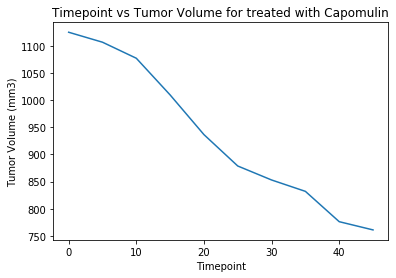

In [44]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap = ["Capomulin"]
capomulin_df = df_master[df_master["Drug Regimen"].isin(cap)]
group_cap1_df = pd.DataFrame({"Tumor Volume" : capomulin_df.groupby("Timepoint")["Tumor Volume (mm3)"].sum()}).reset_index()

x = group_cap1_df ["Timepoint"]
y = group_cap1_df ["Tumor Volume"]

#Plot Labels
plt.title("Timepoint vs Tumor Volume for treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
lineplot = plt.plot(x,y)
                 


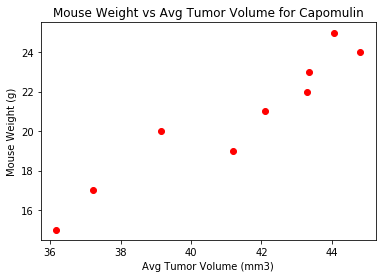

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
group_cap2_df = pd.DataFrame({"Tumor Volume" : capomulin_df.groupby( "Weight (g)")["Tumor Volume (mm3)"].mean()}).reset_index()

# "Mouse ID","Timepoint",
plt.title("Mouse Weight vs Avg Tumor Volume for Capomulin")
plt.ylabel("Mouse Weight (g)")
plt.xlabel("Avg Tumor Volume (mm3)")

y_scatter = group_cap2_df["Weight (g)"]
x_scatter = group_cap2_df["Tumor Volume"]

plt.scatter(x_scatter, y_scatter, marker="o", color="red")
plt.show()


## Correlation and Regression

The correlation between both factors is 0.95
The r-squared is: 0.9


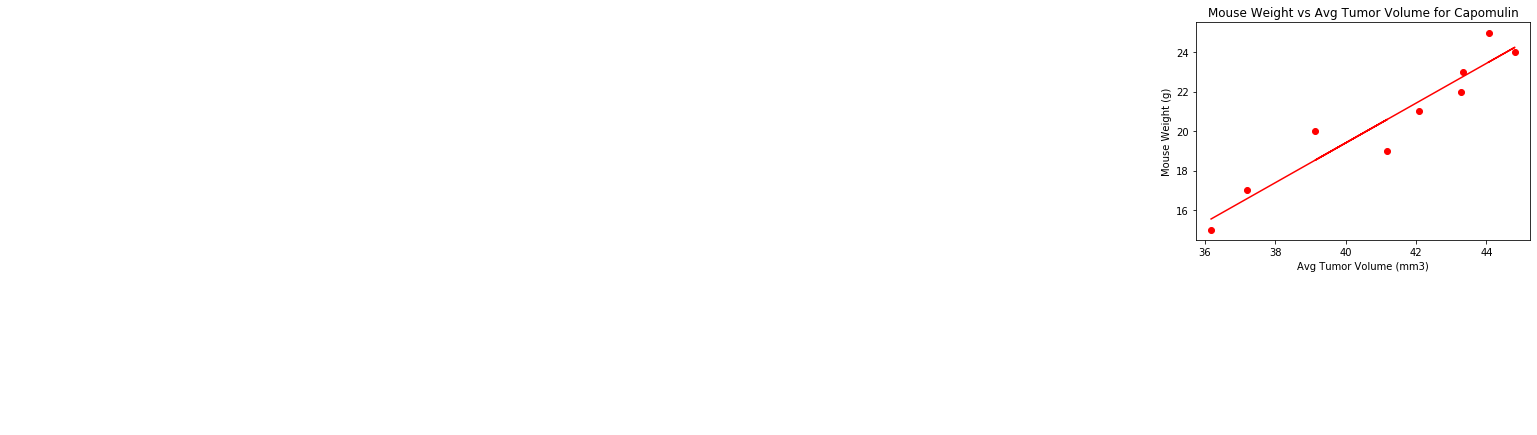

In [34]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# "Mouse ID","Timepoint",

y_scatter = group_cap2_df["Weight (g)"]
x_scatter = group_cap2_df["Tumor Volume"]

#calculate correlation coefficient
correlation = st.pearsonr(x_scatter,y_scatter)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#calculate linear regression & plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_scatter , y_scatter)
regress_values = x_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot the scatter plot
plt.scatter(x_scatter, y_scatter, marker="o", color="red")

#labels
print(f"The r-squared is: {round(rvalue**2,2)}")
plt.title("Mouse Weight vs Avg Tumor Volume for Capomulin")
plt.ylabel("Mouse Weight (g)")
plt.xlabel("Avg Tumor Volume (mm3)")

plt.plot(x_scatter,regress_values,"r-")
plt.annotate(line_eq,(2,5),fontsize=4,color="red")

plt.show()